# **Pets Analysis**
**Estudiantes: Daniela Olarte, Duvan Cuero y Alexander Sanchez**

Millones de animales sufren en la calle o son sacrificados en refugios todos los días en todo el mundo. Si se pueden encontrar hogares para ellos, se pueden salvar muchas vidas preciosas – y se pueden crear más familias felices.
Esta competencia busca que se los participantes puedan proponer algoritmos que permitan predecir la capacidad de adopción de las mascotas, ¿con qué rapidez se adopta una mascota?

In [46]:
import pandas as pd                  
import matplotlib.pyplot as plt      
import seaborn as sns                
import numpy as np                   
import warnings

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import classification_report     
from sklearn import metrics
from sklearn import neighbors  
from sklearn import tree

from copy import deepcopy                            

from numpy.random import default_rng                
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline  

In [7]:
#files.upload()
df = pd.read_csv('train.csv',  na_values='?')

# *1. ¿Cuantos registros y variables cuenta el dataset?*


In [3]:
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [5]:
df.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

El dataset tiene 24 variables y 14993 entradas

# *2. ¿Cómo están los valores de la variable Age?*
* ¿Cuál es la distribución por tipo de animal
* Cuales son los estadísticos descriptivos para esta variable.


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

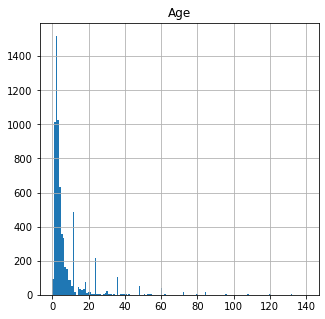

In [16]:
variable = 'Age'
gatos = df.loc[df['Type'] == 2] # 2 = Cat
num_bins = 150
gatos.hist(column=variable, bins=num_bins, figsize=(5,5), range=[0,140])

De acuerdo al histograma, la mayor cantidad de gatos tienen entre 0 y 10 meses. 

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

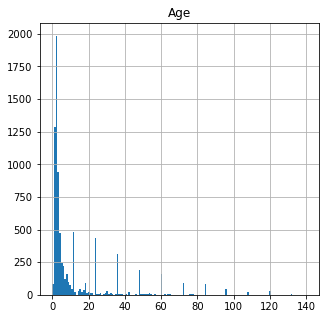

In [17]:
variable = 'Age'
perros = df.loc[df['Type'] == 1] # 1 = Dog
num_bins = 150
perros.hist(column=variable, bins=num_bins, figsize=(5,5), range=[0,140])

De acuerdo al histograma, la mayor cantidad de perros tienen entre 0 y 10 meses. 

# *3. ¿Hay más datos de perros o de gatos?*


In [13]:
df['Age'].describe()

count    14993.000000
mean        10.452078
std         18.155790
min          0.000000
25%          2.000000
50%          3.000000
75%         12.000000
max        255.000000
Name: Age, dtype: float64

In [20]:
print("Perros: ",len(perros), "Gatos: ",len(gatos))

Perros:  8132 Gatos:  6861


Hay una mayor cantidad de perros que de gatos

# *4. ¿Cómo es la velocidad de adopción para perros y gatos?*

In [21]:
pd.crosstab(df['Type'], df['AdoptionSpeed'], margins = True, normalize="index")

AdoptionSpeed,0,1,2,3,4
Type,,,,,
1,0.020905,0.176463,0.266109,0.239670,0.296852
2,0.034980,0.241218,0.272992,0.190934,0.259875
All,0.027346,0.206096,0.269259,0.217368,0.279931


Se puede evidenciar que la adopción para ambos, tanto perros como gatos, tiende a ser lenta. El dato más relevante está en el mes 1 donde fue cuando más hubo adopciones. 

# *5. Encuentre los nombres sin valores*
* ¿Cuántos para gatos y perros?
* ¿Eliminar o reemplazar los registros?, justifique


In [22]:
gatos.isna().sum()

Type               0
Name             608
Age                0
Breed1             0
Breed2             0
Gender             0
Color1             0
Color2             0
Color3             0
MaturitySize       0
FurLength          0
Vaccinated         0
Dewormed           0
Sterilized         0
Health             0
Quantity           0
Fee                0
State              0
RescuerID          0
VideoAmt           0
Description        9
PetID              0
PhotoAmt           0
AdoptionSpeed      0
dtype: int64

In [23]:
perros.isna().sum()

Type               0
Name             649
Age                0
Breed1             0
Breed2             0
Gender             0
Color1             0
Color2             0
Color3             0
MaturitySize       0
FurLength          0
Vaccinated         0
Dewormed           0
Sterilized         0
Health             0
Quantity           0
Fee                0
State              0
RescuerID          0
VideoAmt           0
Description        3
PetID              0
PhotoAmt           0
AdoptionSpeed      0
dtype: int64

Los datos nulos se encuentran en el nombre y la description en ambos casos: gatos y perros

In [26]:
perros['Name'].dropna()
perros['Description'].fillna('No description',inplace = True)

/var/folders/m1/y83lzzrj3g9cwk3vm5gds84r0000gn/T/ipykernel_48569/460137918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perros['Description'].fillna('No description',inplace = True)


In [27]:
gatos['Name'].dropna()
gatos['Description'].fillna('No description',inplace = True)

/var/folders/m1/y83lzzrj3g9cwk3vm5gds84r0000gn/T/ipykernel_48569/1113749045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gatos['Description'].fillna('No description',inplace = True)


In [28]:
perros.isna().sum()

Type               0
Name             649
Age                0
Breed1             0
Breed2             0
Gender             0
Color1             0
Color2             0
Color3             0
MaturitySize       0
FurLength          0
Vaccinated         0
Dewormed           0
Sterilized         0
Health             0
Quantity           0
Fee                0
State              0
RescuerID          0
VideoAmt           0
Description        0
PetID              0
PhotoAmt           0
AdoptionSpeed      0
dtype: int64

In [29]:
gatos.isna().sum()

Type               0
Name             608
Age                0
Breed1             0
Breed2             0
Gender             0
Color1             0
Color2             0
Color3             0
MaturitySize       0
FurLength          0
Vaccinated         0
Dewormed           0
Sterilized         0
Health             0
Quantity           0
Fee                0
State              0
RescuerID          0
VideoAmt           0
Description        0
PetID              0
PhotoAmt           0
AdoptionSpeed      0
dtype: int64

La variable Name es una variable cualitativa, por lo cual no nos diria ningun tipo de information, por ende se puede eliminar.
La variable Description no es una variable relevante y por ende se puede reemplazar por otro valor.

# *6. ¿la salud podría significar algo en la velocidad de adopción?*

(Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury), 

In [30]:
pd.crosstab(df.loc[df['Health'] != 0]['Health'], df['AdoptionSpeed'], margins = True, normalize="index")

AdoptionSpeed,0,1,2,3,4
Health,,,,,
1,0.027076,0.207142,0.271101,0.217571,0.277110
2,0.035343,0.185031,0.220374,0.203742,0.355509
3,0.029412,0.058824,0.176471,0.323529,0.411765
All,0.027346,0.206096,0.269259,0.217368,0.279931


El estado de salud importa porque entre mas saludable sea, mas probabilidades hay de que lo adopten.

# *7. ¿Cuales son los cinco nombres más populares para los perros?*

In [32]:
n = 5
perros['Name'].value_counts().index.tolist()[:n]

['Lucky', 'Puppy', 'Brownie', 'Max', 'Baby']

# *8. Revise la relación entre la variable de edad y la velocidad de adopción.*

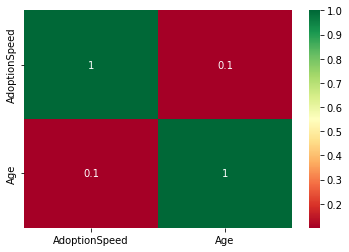

In [33]:
corr = ["AdoptionSpeed",'Age']
ax = sns.heatmap(df[corr].corr(),annot=True,cmap='RdYlGn')

No existe una relacion entre las dos variables.

# *9. ¿Existe alguna relación entre la longitud del nombre y la velocidad de adopción?*.

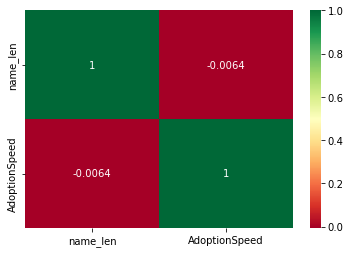

In [34]:
dfCopy = df.copy()
dfCopy["Name"] = dfCopy["Name"].astype(str)
dfCopy["name_len"]=dfCopy.loc[:,"Name"].apply(len)
corr = ["name_len",'AdoptionSpeed']
ax = sns.heatmap(dfCopy[corr].corr(),annot=True,cmap='RdYlGn')

No existe una relacion entre las dos variables.

# *10. Ejecute las siguientes líneas decódigo e interprete*

In [35]:
df_2 = df.dropna().copy()
df_2 = df_2.loc[df_2.Name.isna() != True].copy()
df_2["len_name"] = df_2.loc[:,"Name"].apply(len)
df_2["new_age"] = pd.cut(df_2.Age,bins=np.arange(0,300,12,dtype=int),
                         labels=np.arange(0,len(np.arange(0,300,12,dtype=int)))[:-1],include_lowest=True).astype(int)

array([[<AxesSubplot:title={'center':'new_age'}>]], dtype=object)

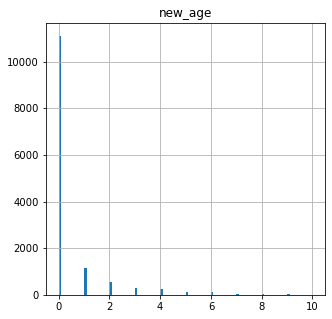

In [36]:
atributo = 'new_age'
num_bins = 100
df_2.hist(column=atributo, bins=num_bins, figsize=(5,5), range=[0,10])  #Histograma.b

El dataframe evaluado no tiene valores nulos y crea 2 variables nuevas: longitud del nombre y edad.

# *11. Ejecute las siguientes líneas decódigo e interprete*

In [37]:
from sklearn import tree
from sklearn.model_selection import train_test_split

features = list(set(df_2.columns) - set(["AdoptionSpeed","PetID","RescuerID",
                                         "Description","Name","Age","PhotoAmt","VideoAmt"]))

X_train,X_test,y_train,y_test = train_test_split(df_2[features],df_2.AdoptionSpeed,test_size=0.33,random_state=42)

El dataframe particiona los datos de entrenamiento y los datos de prueba con enfoque en la variable target que es AdoptionSpeed. Ademas de que toma los datos como independientes excepto las definidas por la variable 'features'

# *12. Ejecute e interprete los resultados de clasificación (precision and recall)*

In [38]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.07      0.07      0.07       125
           1       0.28      0.31      0.29       915
           2       0.32      0.31      0.32      1245
           3       0.26      0.27      0.26       967
           4       0.41      0.36      0.38      1277

    accuracy                           0.31      4529
   macro avg       0.27      0.26      0.26      4529
weighted avg       0.31      0.31      0.31      4529



Aqui se evidencia un modelo de arboles de decision donde se introducen las variables creadas en la celda anterior. 
En la parte de impresión del reporte se hace con el fin de evaluar la eficacia del modelo por medio de  las estadisticas.

# *13. Ejecute las siguientes líneas de código ¿Cuál es el propósito de mutual_info_classif?*

In [39]:
discrete_features = [True,False,False,False,False,False,
                    True,False,False,False,False,
                    True,True,False,False,False,False,False]

In [40]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X,y,discrete_features):
    mi_scores = mutual_info_classif(X,y,discrete_features =discrete_features)
    mi_scores = pd.Series(mi_scores,name="MI Scores",index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_train,y_train,discrete_features)
mi_scores[::3]

Breed2        0.033395
Gender        0.010760
Color3        0.005438
Vaccinated    0.003439
Color1        0.000000
len_name      0.000000
Name: MI Scores, dtype: float64

In [41]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending = True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width,scores)
    plt.yticks(width,ticks)
    plt.title("Mutual Information Scores")

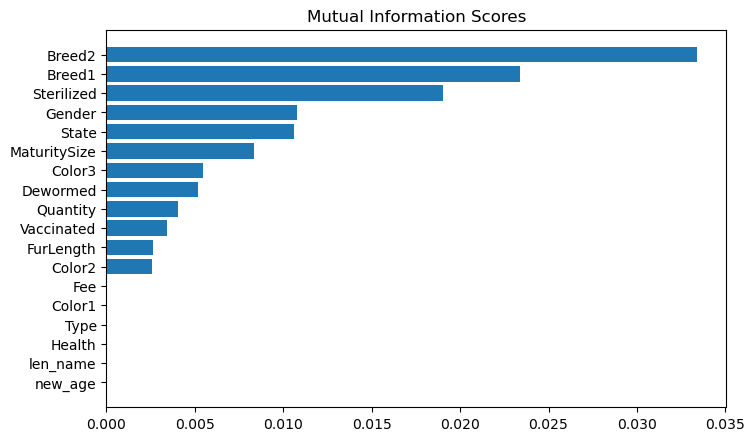

In [42]:
plt.figure(dpi=100,figsize=(8,5))
plot_mi_scores(mi_scores)

El propósito de mutual_info_classif es retornar la informacion mutua de cada variable donde estas variables mutuas son una medida de la dependencia. Es decir, esta representa la cantidad de información obtenida sobre una variable aleatoria al observar la otra variable aleatoria. Esta información se saca apartir de la informacion de las variables independientes y la variable target.

# *14. Con base a los anteriores resultados seleccione cuatro variables, entrene y evalué un nuevo modelo con las mismas configuraciones y datos. Interprete el proceso y los nuevos resultados*

In [45]:
input = ["Breed1","Sterilized","State","MaturitySize"] #VARIABLES SELECCIONADAS
features = deepcopy(df_2[input])

X_train,X_test,y_train,y_test = train_test_split(features,df_2.AdoptionSpeed,test_size=0.33,random_state=42)

In [47]:
vr = tree.DecisionTreeClassifier()
vr = vr.fit(X_train,y_train)

y_pred = vr.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.08      0.02      0.04       125
           1       0.28      0.25      0.27       915
           2       0.32      0.57      0.41      1245
           3       0.28      0.11      0.15       967
           4       0.50      0.42      0.46      1277

    accuracy                           0.35      4529
   macro avg       0.29      0.27      0.26      4529
weighted avg       0.35      0.35      0.33      4529



Este modelo mejora en su precision en comparación con el modelo que usaba todas las variables, sin embargo, la 'mejora' es muy poquita. En cuanto al recall, a exccepcion de el porcentaje de animales adoptados en el mes 1 y los que nunca se adoptaron, los porcentajes disminuyeron.

Se puede concluir que aunque el modelo mejora en precision (en pequeña proporción) no lo es del todo efectivo debido a que disminuye en la mayoria de las variables de recall. 